In [17]:
###############################################################################################
#
# exécutez cette cellule avant d'utiliser le reste du notebook
#
# supprimez-là si vous exécutez ce notebook en-dehors de la distribution CHIM2-ON1 #
#
###############################################################################################

import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID as vID
from visualID import color
vID.init(cwd0)

**Début à:** Sunday 05 November 2023, 20:32:14  
**Hostname:** ip-sw-install-nico.insa-toulouse.fr (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/logoDebut.svg" style="margin-left:auto; margin-right:auto"/></p>

## Personnalisation avancée d'un graphe

### Définir les limites d'un tracé ainsi que l'ecart entre deux graduations principales

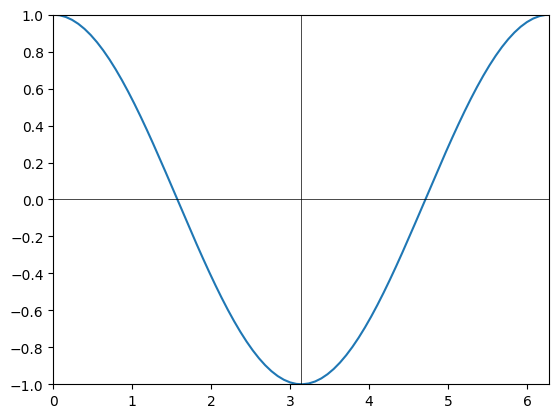

In [8]:
from pylab import *  

x = linspace(0,5*pi,200)

plot(x,cos(x))

xlim(0,2*pi)                              # Défintion de la limite du tracé selon X (abscisse) entre 0 et 2*pi (abscisse)
ylim(-1, 1)                               # Défintion de la limite du tracé selon Y (ordonnée) entre -1 et 1

xticks(arange(0, 2*pi, step=1.0))         # Graduation principale selon X tous les 1
yticks(arange(-1, 1.1, step=0.2))         # Graduation principale selon Y tous les 0.2

axhline(y=.0,color='black',linewidth=0.5) # ajout d'une ligne horizontale à x=0
axvline(x=pi,color='black',linewidth=0.5) # ajout d'une ligne verticale à y= pi

plt.show()

### Définir l'ecart entre deux graduations principales et ajouter une graduation secondaire

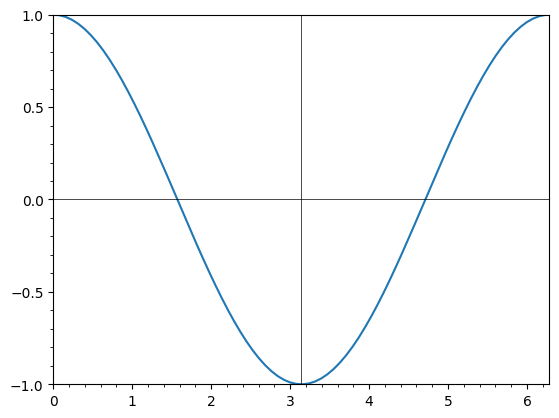

In [9]:
plot(x,cos(x)) 

xlim(0, 2*pi)
ylim(-1, 1)

axhline(y=0.0,color='black',linewidth=0.5)
axvline(x=pi,color='black',linewidth=0.5)

minorticks_on()
ax = gca()
ax.xaxis.set_major_locator(MultipleLocator(1))     # Graduation principale selon X tous les 1
ax.xaxis.set_minor_locator(MultipleLocator(0.2))   # Graduation secondaire selon X tous les 0.2
ax.yaxis.set_major_locator(MultipleLocator(0.5))   # Graduation principale selon Y tous les 0.5
ax.yaxis.set_minor_locator(MultipleLocator(0.1))   # Graduation secondaire selon Y tous les 0.1

plt.show()

### Spécifier la position de la légende

<div class="rq">
    
Vous pouvez spécifier manuellement l'endroit ou vous voulez la légende grâce à l'option `loc=` aux expressions suivantes : 'upper left', 'upper center', 'upper right', 'center left', 'center', 'center right', 'lower left', 'lower center', 'lower right'. Par exemple : 
</div>

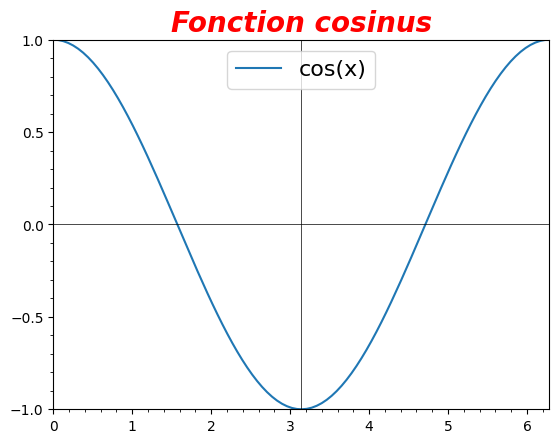

In [58]:
plot(x, cos(x), label="cos(x)") # Tracé avec la définition de la légende
xlim(0, 2*pi)
ylim(-1, 1)

axhline(y=.0,color='black',linewidth=0.5)
axvline(x=pi,color='black',linewidth=0.5)

minorticks_on()
ax = gca()
ax.xaxis.set_major_locator(MultipleLocator(1))  
ax.xaxis.set_minor_locator(MultipleLocator(0.2))   
ax.yaxis.set_major_locator(MultipleLocator(0.5)) 
ax.yaxis.set_minor_locator(MultipleLocator(0.1))  

title("Fonction cosinus", fontsize=20, color="red", fontstyle='italic', fontweight='bold')  


legend(loc='upper center', fontsize=16)                        # Affichage de la légende en haut au centre, et taille de la police

plt.show()

### Ajouter les labels des axes, et tracer une grille selon l'axe x, après avoir agrandi la figure pour mieux la lire

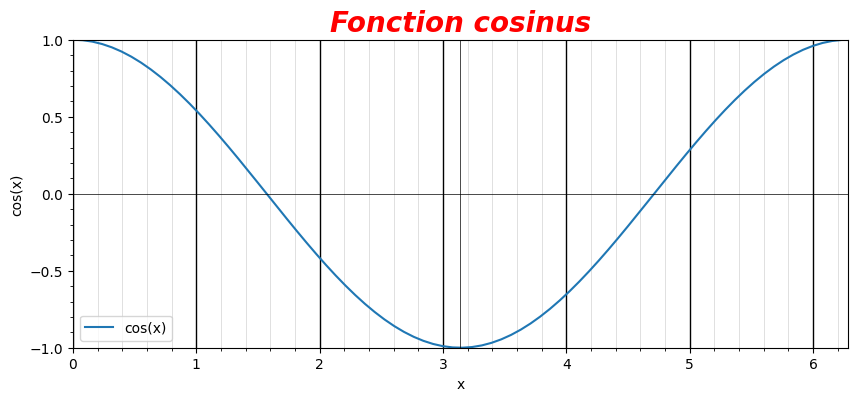

In [12]:
figure(figsize=(10,4))    # agrandissement de la figure

plot(x, cos(x), label="cos(x)") 

xlim(0, 2*pi)
ylim(-1, 1)

axhline(y=.0,color='black',linewidth=0.5)
axvline(x=pi,color='black',linewidth=0.5)

minorticks_on()
ax = gca()
ax.xaxis.set_major_locator(MultipleLocator(1))  
ax.xaxis.set_minor_locator(MultipleLocator(0.2))   
ax.yaxis.set_major_locator(MultipleLocator(0.5)) 
ax.yaxis.set_minor_locator(MultipleLocator(0.1))  

title("Fonction cosinus", fontsize=20, color="red", fontstyle='italic', fontweight='bold')  

legend()                      

xlabel("x")    # label axe x 
ylabel("cos(x)") #label axe y          

grid(axis='x', which='major', color='black', linewidth=1.0)   # pour ajouter une grille selon y, on utilise grid(axis='y') et sur les deux axes, grid(axis='both')
grid(axis='x', which='minor', color='lightgray', linewidth=0.5)   # pour ajouter une grille selon y, on utilise grid(axis='y') et sur les deux axes, grid(axis='both')

plt.show()


## Tracé de plusieurs graphes sur la même figure

### Introduction
<div class="rq">

On a déjà vu qu'il est possible de tracer plusieurs courbes sur un même graphe
</div>

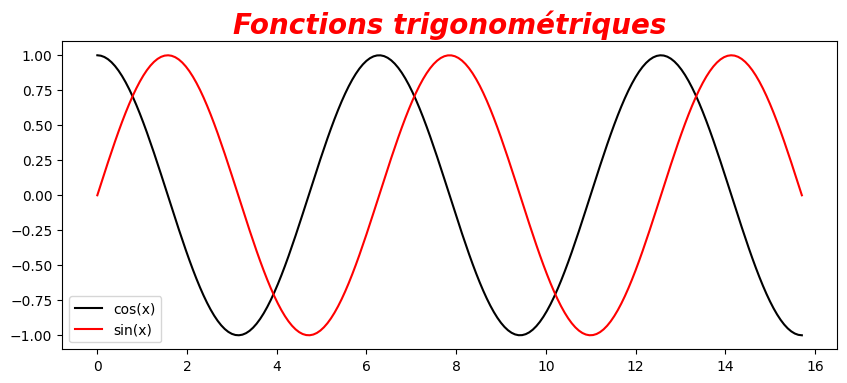

In [13]:
from pylab import *  
x = linspace(0,5*pi,200)

figure(figsize=(10,4))
title("Fonctions trigonométriques", fontsize=20, color="red", fontstyle='italic', fontweight='bold')

plot(x, cos(x), label="cos(x)", color="black")
plot(x, sin(x), label="sin(x)", color="red")

legend();
plt.show()

<div class="rq">

Il est également possible de tracer plusieurs courbes sur des graphes séparés
</div>

### Méthode la plus simple

<div class="rq">

Elle est basée sur l'utilisation de la [commande `subplot`](https://matplotlib.org/3.4.2/api/_as_gen/matplotlib.pyplot.subplot.html), qui permet de créer une contenant un ou plusieurs "sous-graphiques". Elle permet de diviser l'espace de la figure en une grille de sous-graphiques afin de visualiser plusieurs ensembles de données simultanément. L'utilisation générale est `subplot(nlignes,ncols,index)`; où l'index est le numéro du sous-graphique. Par exemple, `subplot(1,3,2)` va permettre de créer un 2ème sous-graphique d'une grille de 1 ligne et 3 colonnes de sous graphiques. Et il faut d'abord définir la taille globale de la figure. 

Chaque sous-graphique va être désigné par un "nom de variable", c'est-à-dire un objet python. Par convention, les sous-graphiques sont notés `ax`, suivi d'un numéro, qu'il ne faut pas confondre avec les axes.
</div>

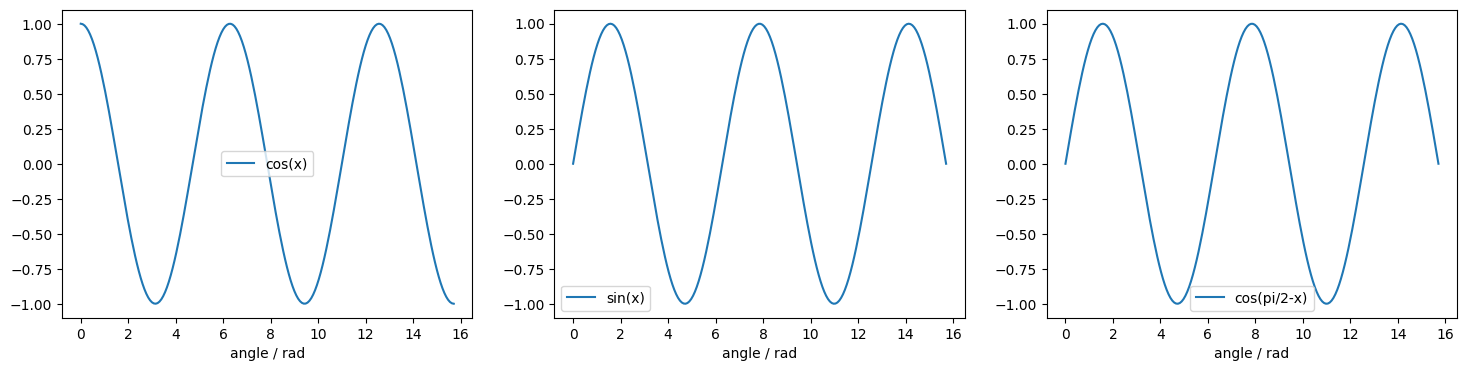

In [42]:
figure(figsize=(18,4))

ax1 = subplot(1, 3, 1)
plot(x, cos(x), label="cos(x)")
xlabel('angle / rad')
legend()

ax2 = subplot(1, 3, 2)
plot(x, sin(x), label="sin(x)")
xlabel('angle / rad')
legend()

ax3 = subplot(1, 3, 3)
plot(x, cos(pi/2-x), label="cos(pi/2-x)")
xlabel('angle / rad')
legend()

<div class="rq">
    
Les options `sharex` et `sharey` peuvent être pratiques. Supposons qu'on trace sur le 3ème graphique une fonction qui varie entre -2 et 2. On aimerait que les deux premiers soient tracés avec la même échelle des ordonnées. Il suffit de préciser à l'aide de l'option `sharey` quel est le sous-graphique `axi` dont l'axe des ordonnées sert de référence.
</div>

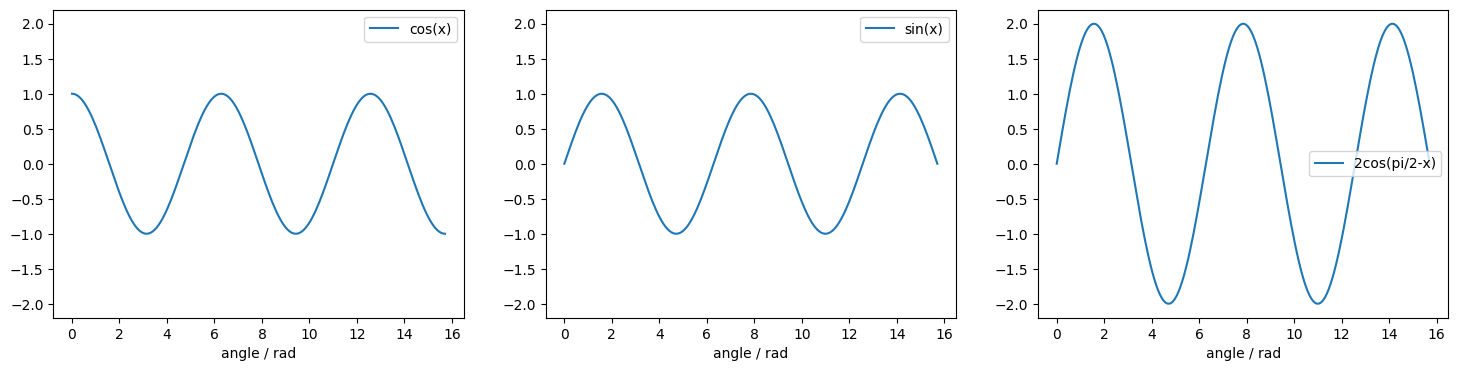

In [50]:
figure(figsize=(18,4))

ax1 = subplot(1, 3, 1, sharey=ax3)
plot(x, cos(x), label="cos(x)")
xlabel('angle / rad')
legend()

ax2 = subplot(1, 3, 2, sharey=ax3)
plot(x, sin(x), label="sin(x)")
xlabel('angle / rad')
legend()

ax3 = subplot(1, 3, 3)
plot(x, 2*cos(pi/2-x), label="2cos(pi/2-x)")
xlabel('angle / rad')
legend()

<div class="rq">

Vous avez remarqué qu'il faut répéter les commandes d'affichage des légendes ou de définition des labels pour chaque sous-graphique. [La page de `matplotlib.pyplot.subplot`](https://matplotlib.org/3.4.2/api/_as_gen/matplotlib.pyplot.subplot.html) donne la liste des arguments de cette fonction (cf `*args` et `**kwargs`).
</div>

### Méthodes plus avancées (FACULTATIF)

#### Le B.A. BA

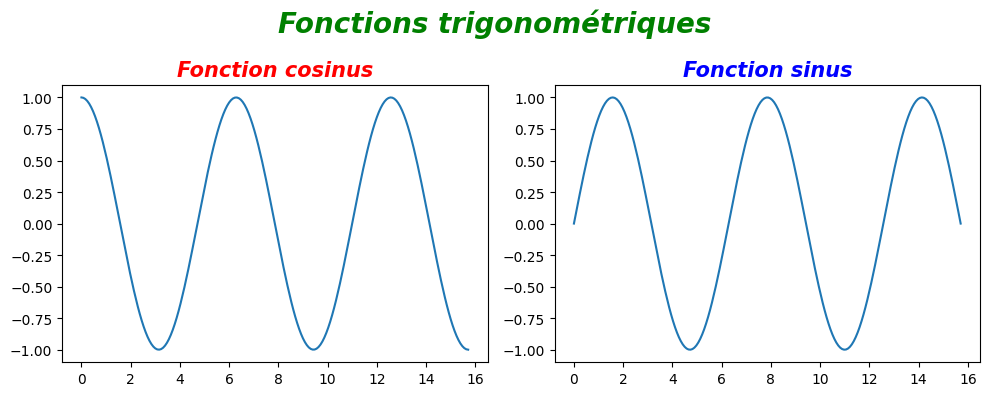

In [15]:
fig, ax = subplots(1,2,figsize=(10,4))       # Definition de 2 zones de tracé sur un figure (2 zones sur 1 seule ligne)

fig.suptitle('Fonctions trigonométriques', fontsize=20, color="green", fontstyle='italic', fontweight='bold') # Titre général de la Figure

# Tracé de la première fonction dans la première zone de la figure
ax[0].plot(x, cos(x))
ax[0].set_title("Fonction cosinus", fontsize=15, color="red", fontstyle='italic', fontweight='bold');

# Tracé de la deuxième fonction dans la deuxième zone de la figure
ax[1].plot(x, sin(x))
ax[1].set_title("Fonction sinus", fontsize=15, color="blue", fontstyle='italic', fontweight='bold')

fig.tight_layout();         # Evite une trop grande superposition des deux graphes
plt.show()

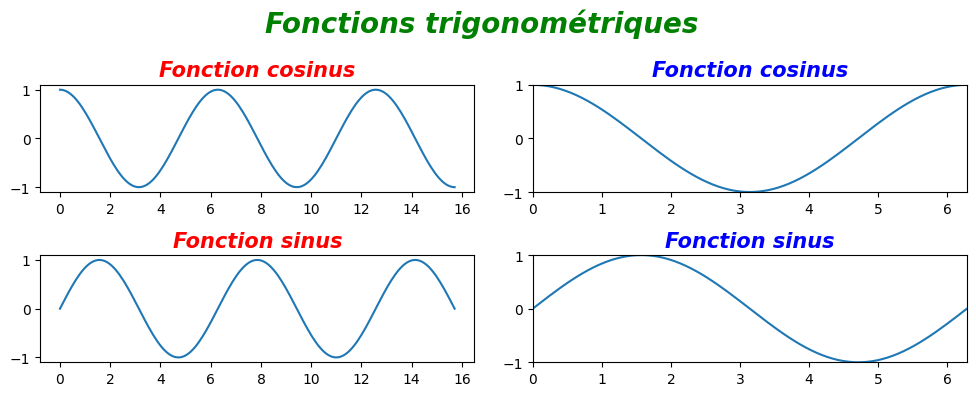

In [14]:
fig, ax = subplots(2,2,figsize=(10,4))              # Definition de 4 zones de tracé sur un figure (2 zones sur 2 lignes)

fig.suptitle('Fonctions trigonométriques', fontsize=20, color="green", fontstyle='italic', fontweight='bold')

# Tracés simples sur la première colonne
ax[0,0].plot(x, cos(x))
ax[0,0].set_title("Fonction cosinus", fontsize=15, color="red", fontstyle='italic', fontweight='bold');
ax[1,0].plot(x, sin(x))
ax[1,0].set_title("Fonction sinus", fontsize=15, color="red", fontstyle='italic', fontweight='bold')

# Tracés sur la deuxième colonne (avec une modification des bornes de tracé en x et y)
ax[0,1].plot(x, cos(x))
ax[0,1].set_xlim(0,2*pi)
ax[0,1].set_ylim(-1,1)
ax[0,1].set_title("Fonction cosinus", fontsize=15, color="blue", fontstyle='italic', fontweight='bold');
ax[1,1].plot(x, sin(x))
ax[1,1].set_xlim(0,2*pi)
ax[1,1].set_ylim(-1,1)
ax[1,1].set_title("Fonction sinus", fontsize=15, color="blue", fontstyle='italic', fontweight='bold')

fig.tight_layout();
plt.show()

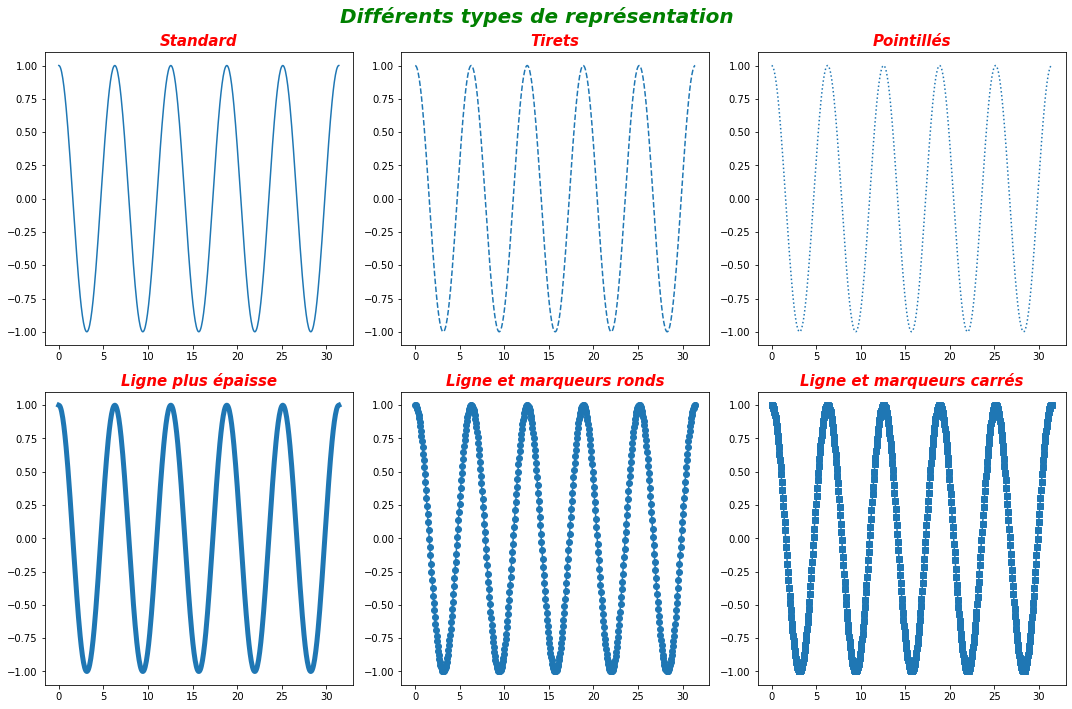

In [6]:
# Il est possible de tracer plusieurs courbes sur des graphes séparés (encore plus complexe)

fig, ax = subplots(2,3,figsize=(15,10))               # Definition de 6 zones de tracé sur un figure (3 zones sur 2 lignes)

fig.suptitle('Différents types de représentation', fontsize=20, color="green", fontstyle='italic', fontweight='bold')

# Tracés simples sur la première ligne
ax[0,0].plot(x, cos(x))
ax[0,0].set_title("Standard", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax[0,1].plot(x, cos(x),linestyle="--")
ax[0,1].set_title("Tirets", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax[0,2].plot(x, cos(x),linestyle=":")
ax[0,2].set_title("Pointillés", fontsize=15, color="red", fontstyle='italic', fontweight='bold')

# Tracés simples sur la deuxième ligne
ax[1,0].plot(x, cos(x), linewidth=5)
ax[1,0].set_title("Ligne plus épaisse", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax[1,1].plot(x, cos(x),marker="o")
ax[1,1].set_title("Ligne et marqueurs ronds", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax[1,2].plot(x, cos(x),marker="s")
ax[1,2].set_title("Ligne et marqueurs carrés", fontsize=15, color="red", fontstyle='italic', fontweight='bold')

fig.tight_layout();
plt.show()

#### Définitions des sous-zones
 On peut définir de la manière suivante différentes zones au sein d'une même figure:
 
  **- 6 zones sur 2 lignes donnera la codification suivante:**
  
 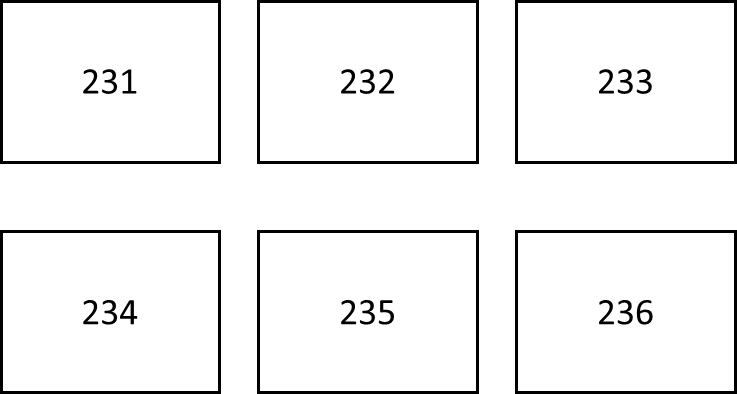
 
  **- 3 zones sur 1 lignes donnera la codification suivante:**
  
 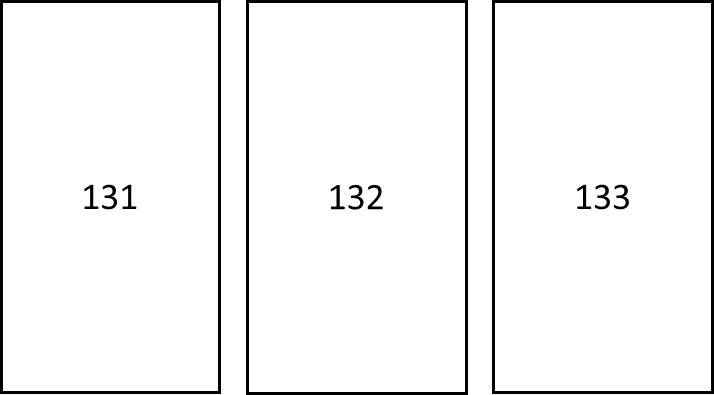
 
  **- 2 zones sur 2 lignes donnera la codification suivante:**
  
  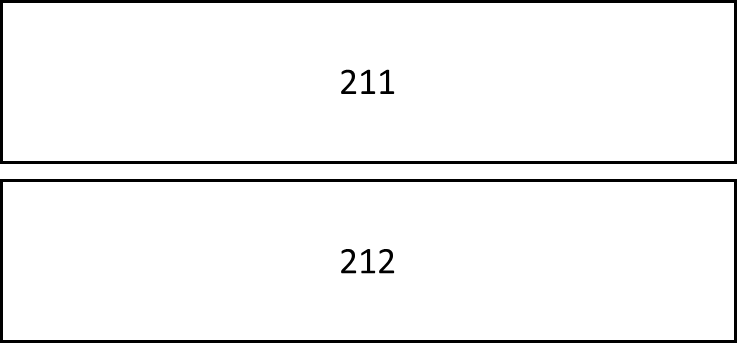

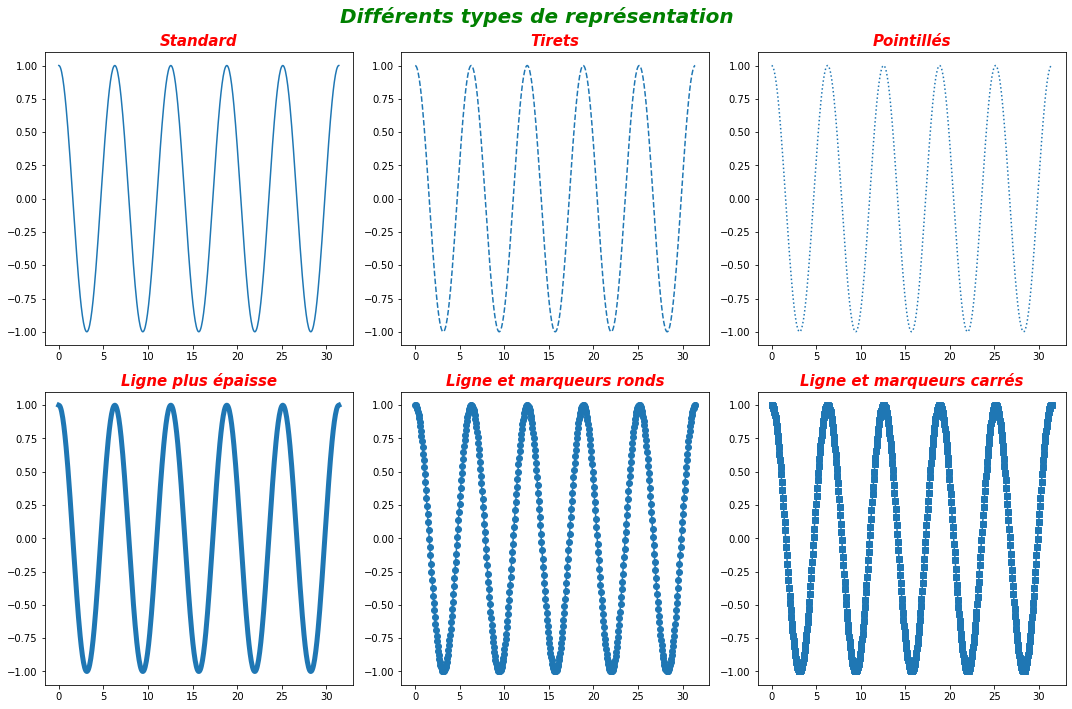

In [7]:
# # Il est possible de tracer plusieurs courbes sur des graphes séparés en utilisant cette codification

figure(figsize=(15,10))
suptitle('Différents types de représentation', fontsize=20, color="green", fontstyle='italic', fontweight='bold')

# Définition de 6 zons sur 2 lignes pour obtenir le m^me graphique que précédemment

ax1 = subplot(231)    
ax2 = subplot(232)
ax3 = subplot(233)
ax4 = subplot(234)
ax5 = subplot(235)
ax6 = subplot(236)

# Tracés simples sur la première ligne
ax1.plot(x, cos(x))
ax1.set_title("Standard", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax2.plot(x, cos(x),linestyle="--")
ax2.set_title("Tirets", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax3.plot(x, cos(x),linestyle=":")
ax3.set_title("Pointillés", fontsize=15, color="red", fontstyle='italic', fontweight='bold')

# Tracés simples sur la deuxième ligne
ax4.plot(x, cos(x), linewidth=5)
ax4.set_title("Ligne plus épaisse", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax5.plot(x, cos(x),marker="o")
ax5.set_title("Ligne et marqueurs ronds", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax6.plot(x, cos(x),marker="s")
ax6.set_title("Ligne et marqueurs carrés", fontsize=15, color="red", fontstyle='italic', fontweight='bold')

tight_layout();
plt.show()

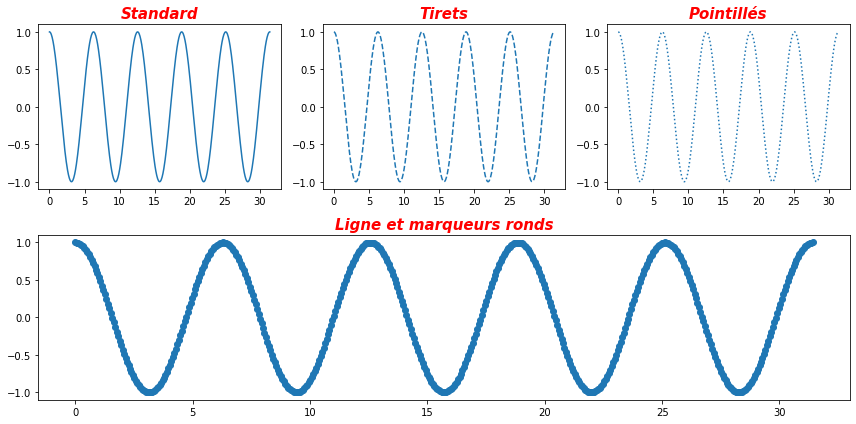

In [8]:
# Il est possible de combiner les codifications afin d'obtenir plus de complexité

figure(figsize=(12, 6))
# Définition de 4 zones de traçage (3 zones sur une première ligne et une grande zone sur une deuxième ligne)

# Première ligne
ax1 = subplot(231)   
ax2 = subplot(232)
ax3 = subplot(233)
ax1.plot(x, cos(x))
ax1.set_title("Standard", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax2.plot(x, cos(x),linestyle="--")
ax2.set_title("Tirets", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax3.plot(x, cos(x),linestyle=":")
ax3.set_title("Pointillés", fontsize=15, color="red", fontstyle='italic', fontweight='bold')

# Deuxième ligne
ax4 = subplot(212)
ax4.plot(x, cos(x),marker="o")
ax4.set_title("Ligne et marqueurs ronds", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
tight_layout();

plt.show()

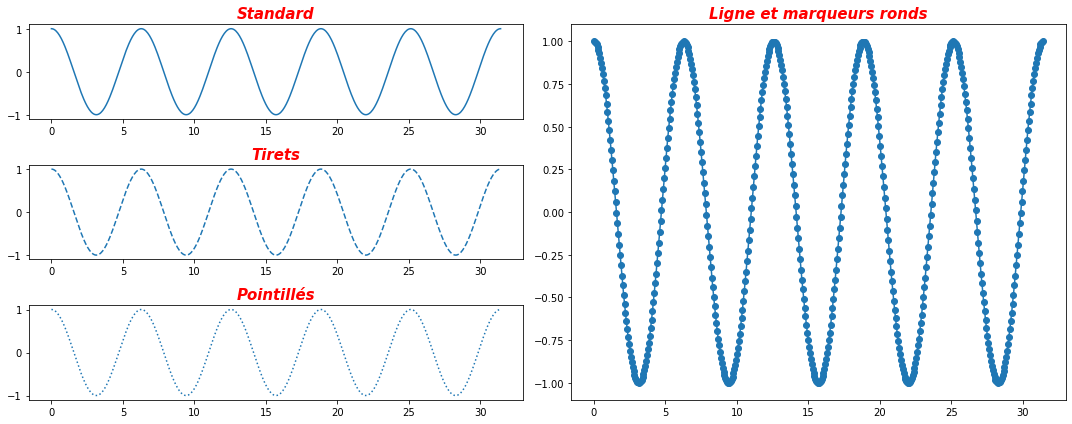

In [9]:
# Il est possible de combiner les codifications afin d'obtenir plus de complexité

figure(figsize=(15, 6))
# Définition de 4 zones de traçage (3 zones sur une première colonne et une grande zone sur une deuxième colonne)

# Première colonne
ax1 = subplot(321)   
ax2 = subplot(323)
ax3 = subplot(325)
ax1.plot(x, cos(x))
ax1.set_title("Standard", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax2.plot(x, cos(x),linestyle="--")
ax2.set_title("Tirets", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax3.plot(x, cos(x),linestyle=":")
ax3.set_title("Pointillés", fontsize=15, color="red", fontstyle='italic', fontweight='bold')

# Deuxième colonne
ax4 = subplot(122)
ax4.plot(x, cos(x),marker="o")
ax4.set_title("Ligne et marqueurs ronds", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
tight_layout();

plt.show()

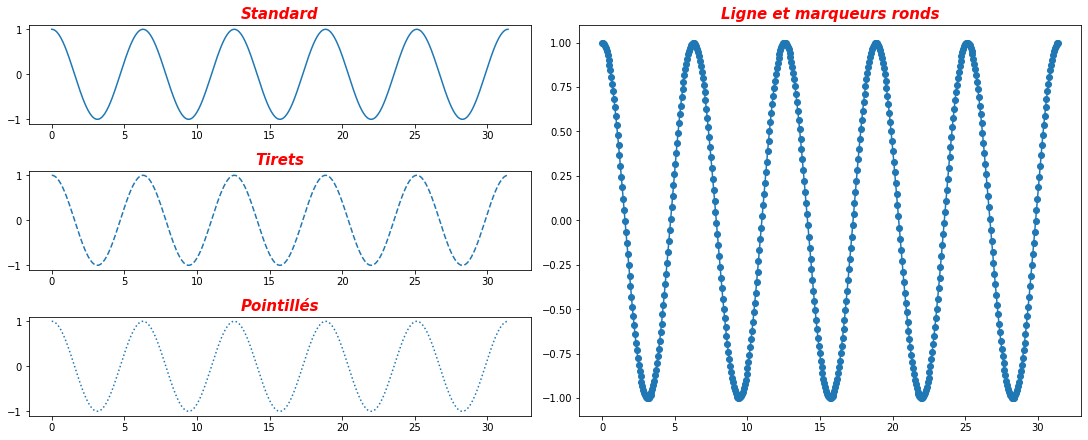

In [10]:
# Il est possible d'obtenir le même résultat avec une approche plus intuitive

outer = [[1,4],
         [2,4],
         [3,4],]

fig, ax = subplot_mosaic(outer, constrained_layout=True,figsize=(15,6))

# Première colonne
ax[1].plot(x, cos(x))
ax[1].set_title("Standard", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax[2].plot(x, cos(x),linestyle="--")
ax[2].set_title("Tirets", fontsize=15, color="red", fontstyle='italic', fontweight='bold')
ax[3].plot(x, cos(x),linestyle=":")
ax[3].set_title("Pointillés", fontsize=15, color="red", fontstyle='italic', fontweight='bold')

# Deuxième colonne
ax[4].plot(x, cos(x),marker="o")
ax[4].set_title("Ligne et marqueurs ronds", fontsize=15, color="red", fontstyle='italic', fontweight='bold');

plt.show()

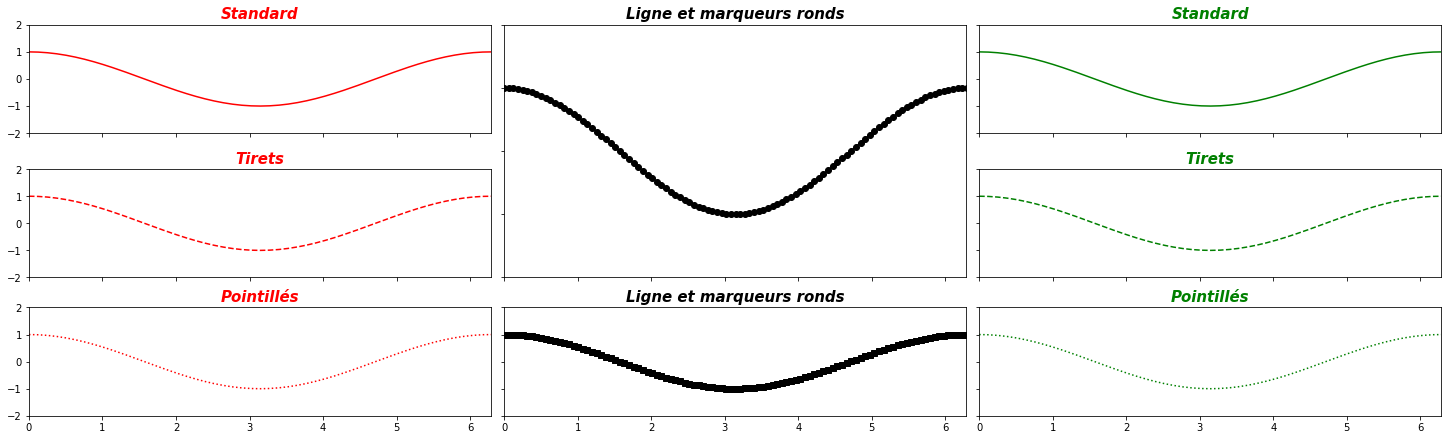

In [11]:
outer = [[1,4,5],
         [2,4,6],
         [3,7,8]]
fig, ax = subplot_mosaic(outer, constrained_layout=True,figsize=(20,6),sharex=True,sharey=True)

ax[1].set_xlim(0,2*pi)
ax[1].set_ylim(-2,2)
ax[1].plot(x, cos(x),color='red')
ax[1].set_title("Standard", fontsize=15, color="red", fontstyle='italic', fontweight='bold')

ax[2].plot(x, cos(x),linestyle="--",color='red')
ax[2].set_title("Tirets", fontsize=15, color="red", fontstyle='italic', fontweight='bold')

ax[3].plot(x, cos(x),linestyle=":",color='red')
ax[3].set_title("Pointillés", fontsize=15, color="red", fontstyle='italic', fontweight='bold')

ax[4].plot(x, cos(x),marker="o",color='black')
ax[4].set_title("Ligne et marqueurs ronds", fontsize=15, fontstyle='italic', fontweight='bold');

ax[5].plot(x, cos(x),color='green')
ax[5].set_title("Standard", fontsize=15, color="green", fontstyle='italic', fontweight='bold')

ax[6].plot(x, cos(x),linestyle="--",color='green')
ax[6].set_title("Tirets", fontsize=15, color="green", fontstyle='italic', fontweight='bold')

ax[8].plot(x, cos(x),linestyle=":",color='green')
ax[8].set_title("Pointillés", fontsize=15, color="green", fontstyle='italic', fontweight='bold')

ax[7].plot(x, cos(x),marker="s",color='black')
ax[7].set_title("Ligne et marqueurs ronds", fontsize=15, fontstyle='italic', fontweight='bold');

plt.show()


In [18]:
###############################################################################################
# supprimez cette cellule si vous exécutez ce notebook en-dehors de la distribution CHIM2-ON1 #
###############################################################################################

vID.end(cwd0)

**Fin à:** Sunday 05 November 2023, 20:46:47  
**Durée:** 00:14:33 300ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoFin.svg" style="margin-left:auto; margin-right:auto"/></p>